In [5]:
# Useful starting lines

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import datetime


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [6]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/akhileshgotmare/Desktop/Git_Junta/data-ml-course-project1/train.csv' # TODO: download train data and supply path here 
y, X, ids = load_csv_data(DATA_TRAIN_PATH)

In [7]:
print(y.shape, X.shape)

(250000,) (250000, 30)


In [8]:
# For entries with missing data, the value -999 is filled, therefore we try to figure out ...
# ... how much of the data is missing

count_miss_instances=np.zeros((len(y),1))
for id in ids:
    count_miss_instances[id-100000]=sum(X[id-100000] == -999.0)
print(np.median(count_miss_instances))
print(np.mean(count_miss_instances))
    

7.0
6.320208


As can be seen from above, for every instance on an average about 6 field/attribute values are missing, we further perform a feature-wise check for the missing values.

In [9]:
count_miss_features=np.zeros((X.shape[1],1))
for d in range(X.shape[1]):
    count_miss_features[d]=sum(X[:,d] == -999.0)
print(count_miss_features.T)    

[[  38114.       0.       0.       0.  177457.  177457.  177457.       0.
        0.       0.       0.       0.  177457.       0.       0.       0.
        0.       0.       0.       0.       0.       0.       0.   99913.
    99913.   99913.  177457.  177457.  177457.       0.]]


Here we realize that only some (11 in number - although not few) of the features have missing values. Since the number of instances where these features have missing values is quite a large fraction of the data, we decide to drop these features from our data for further analysis. 

In [10]:
#Counting the number of features that have missing values

count_miss_features=np.zeros((X.shape[1],1))
del_features=[]

# We create an array del_features (since we plan to drop these features) ...
# ... to store the index of the attributes with missing values 
for d in range(X.shape[1]):
    count_miss_features[d]=sum(X[:,d] == -999.0)
    if count_miss_features[d]>0:
            del_features=np.r_[del_features,d]
print(del_features)
print(sum(count_miss_features > 0))


[  0.   4.   5.   6.  12.  23.  24.  25.  26.  27.  28.]
[11]


In [11]:
# The features having indices in del_features computed above are now dropped from the data ... 
# ... thus reducing the tX matrix to 19 columns (deleting 11)

X_not_cleaned = X # Let's keep a copy of the old data, before cleaning it
X = np.delete(X, del_features, axis=1)
print(X.shape)
    
# In the next step we standardize the data using functions from the helper file
    
from helpers import *
tX, mean_tX, std_tX = standardize(X)
print(tX.shape) #this tX has the column of 1's appended in the beginning of the data matrix


(250000, 19)
(250000, 20)


In [12]:
# Trying to find outliers
#plt.scatter(tX1[:,4],tX1[:,3])

Do your thing crazy machine learning thing here :) ...

## Method 1: Linear regression using gradient descent: 

least_squares_GD (y, tx, gamma, max_iters) 

In [9]:
# Linear regression using gradient descent

def least_squares_GD(y,tx,gamma,max_iters):
    
    initial_w = np.random.randn(tx.shape[1])
    losses, ws = gradient_descent(y, tx, initial_w, max_iters, gamma)
    final_w = ws[-1][:]
    
    return final_w, ws, losses
    
    

def compute_loss(y, tx, w):
    e=y-np.dot(tx,w)
    L= ( 1/(2*len(y)) )*np.dot(e.T,e) # Least squares error - assuming the (1/2N)*(e.T*e) form
    return L

def compute_gradient(y, tx, w):
    e=y-np.dot(tx,w)
    grad_L = (-1/len(y))*np.dot(tx.T,e) #Using the expression gradient of Loss = (-1/N)*(X.T*e)
    return grad_L

def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        
        # Compute Loss and Gradient
        L = compute_loss(y, tx, w)
        grad_L = compute_gradient(y, tx, w)
        
        # update w by gradient
        w = w - gamma*grad_L
        
        loss = L

        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        
        print("Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))

    return losses, ws

## Generate predictions with method 1 

In [10]:
DATA_TEST_PATH = '/Users/akhileshgotmare/Desktop/Git_Junta/data-ml-course-project1/test.csv' # TODO: download train data and supply path here 
_, X_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [11]:
X_test = np.delete(X_test, del_features, axis=1)
tX_test, mean_tX_test, std_tX_test = standardize(X_test)
print(tX_test.shape)

(568238, 20)


In [ ]:
initial_w = np.random.randn(tX.shape[1],1)
max_iters=10
gamma=0.02
losses,ws = gradient_descent(y, tX, initial_w, max_iters, gamma)


In [ ]:
OUTPUT_PATH = 'method1.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

## Method 2: Linear regression using stochastic gradient descent:
least_squares_GD (y, tx, gamma, max_iters) 

In [12]:
def compute_stoch_gradient(y, tx, w):
    
    e=y-np.dot(tx,w)
    grad_L = (-1/(len(y)))*(np.dot(tx.T,e))
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    
    return grad_L


def stochastic_gradient_descent(y, tx, gamma, max_epochs):
    """Stochastic gradient descent algorithm."""
    
    # Define parameters to store w and loss
    batch_size = 1
    initial_w = np.random.randn(tx.shape[1])
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_epochs):
        i=0
        
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            i+=1
            
            #if i>50000:
            #    return losses, ws
            
            # Compute Loss and Gradient
            L = compute_loss(minibatch_y, minibatch_tx, w)
            grad_L = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        
        
            # update w by gradient
            w = w - gamma*grad_L
            loss = L
        

            # store w and loss
            ws.append(np.copy(w))
            losses.append(loss)
    
            print("Stochastic Gradient Descent({bi}): loss={l}".format(
              bi=i , l=loss, w0=w[0], w1=w[1]))
    
    return losses, ws

In [ ]:
# Define the parameters of the algorithm.
max_epochs = 2
gamma = 0.000002


# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tX, gamma, max_epochs)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(1): loss=114.45542252743337
Stochastic Gradient Descent(2): loss=34.87179778880736
Stochastic Gradient Descent(3): loss=19.92256907057321
Stochastic Gradient Descent(4): loss=21.938365614311508
Stochastic Gradient Descent(5): loss=59.063322978300064
Stochastic Gradient Descent(6): loss=17.854808354810682
Stochastic Gradient Descent(7): loss=4.8743124555222535
Stochastic Gradient Descent(8): loss=68.5532540549667
Stochastic Gradient Descent(9): loss=2.7168780432144812
Stochastic Gradient Descent(10): loss=8.100361095381135
Stochastic Gradient Descent(11): loss=15.84164530350559
Stochastic Gradient Descent(12): loss=122.976581367207
Stochastic Gradient Descent(13): loss=44.32756915778
Stochastic Gradient Descent(14): loss=38.739228547268056
Stochastic Gradient Descent(15): loss=56.04487523898361
Stochastic Gradient Descent(16): loss=13.370220447693564
Stochastic Gradient Descent(17): loss=47.70126113239698
Stochastic Gradient Descent(18): loss=38.6866142067097

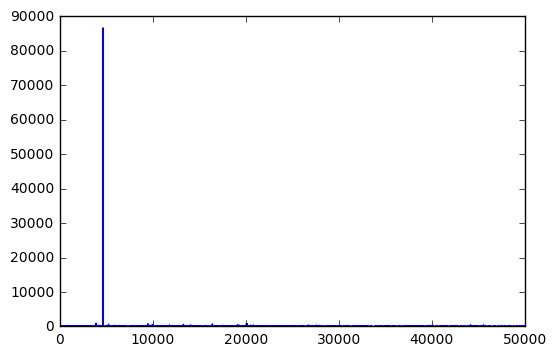

In [16]:
for i in range(
    plt.plot(gradient_losses)

## Method 3: Least squares regression using normal equations:
least_squares (y, tx)

In [9]:
def least_squares(y,tx):
    weights=np.dot( np.linalg.inv(np.dot(tx.T,tx)), np.dot(tx.T,y) )
    return weights

## Generate predictions with method 3

#### Method 4: Ridge regression using normal equations

In [232]:
import myFunctions as my
from plots import bias_variance_decomposition_visualization

def cross_validation(y, x, k_indices, k, lamb):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train: TODO
    tx_tr = x[np.delete(k_indices, (k), axis=0).flatten()]
    y_tr = y[np.delete(k_indices, (k), axis=0).flatten()]
    tx_te = x[k_indices[k]]
    y_te = y[k_indices[k]]
    
    
    # regression/classification method
    w = my.ridge_regression(y_tr, tx_tr, lamb)
    
    # calculate the loss for train and test data: TODO
    loss_tr = my.compute_loss(y_tr, tx_tr, w)
    loss_te = my.compute_loss(y_te, tx_te, w)
    
    
    return loss_tr, loss_te

def cross_validation_demo(y, X):
    # parameters
    seed = 56
    k_fold = 10
    
    # hyperparameters
    degrees = [1, 2, 3]
    lambdas = np.logspace(-5, 2, 15)
    
    # split data in k fold
    k_indices = my.build_k_indices(y, k_fold, seed)
    
    
    # define lists to store the loss of training data and test data
    rmse_tr = np.zeros((len(degrees),len(lambdas)))
    rmse_te = np.zeros((len(degrees),len(lambdas)))
    var_tr = np.zeros((len(degrees),len(lambdas)))
    var_te = np.zeros((len(degrees),len(lambdas)))
    
    # Hyperparameter 1
    for ind, degree in enumerate(degrees):
        print(ind)
        # Build polynomial function
        tX = my.build_poly(X, degree)
        
        loss_tr = np.zeros((len(lambdas),))
        loss_te = np.zeros((len(lambdas),))
        
        for ind2, lamb in enumerate(lambdas):
        
            # Cross-validation
            for k in range(k_fold):
                loss_tr[k], loss_te[k] = cross_validation(y, tX, k_indices, k, lamb)
                
            rmse_tr[ind,ind2] = np.mean(loss_tr)
            rmse_te[ind,ind2] = np.mean(loss_te)
            #var_tr[ind] = np.std(loss_tr)
            #var_te[ind] = np.std(loss_te)
        
        
    return rmse_tr, rmse_te, var_tr, var_te, degrees, lambdas

rmse_tr, rmse_te, var_tr, var_te, degrees, lambdas = cross_validation_demo(y, tX)


0
1
2


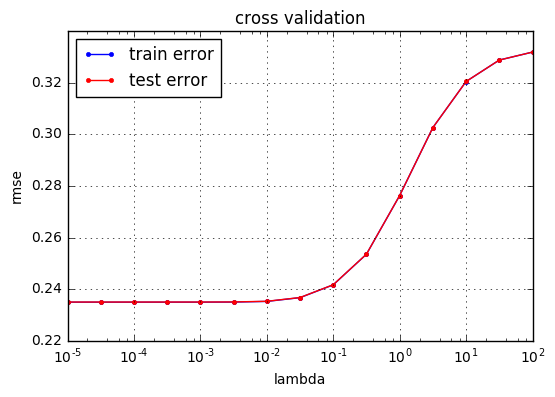

In [233]:
from plots import *

cross_validation_visualization(lambdas, rmse_tr[0].T, rmse_te[0].T) 

In [234]:
degree = 2
lamb = 1
final_X = my.build_poly(tX, degree)
w = my.ridge_regression(y, final_X, lamb)
y_pred = predict_labels(w, final_X)
loss = len(np.nonzero(y_pred-y)[0])/len(y)
loss

0.279956

### Generate predictions with method 4

In [ ]:
DATA_TEST_PATH = '/Users/akhileshgotmare/Desktop/Git_Junta/data-ml-course-project1/test.csv' # TODO: download train data and supply path here 
_, X_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
tX_test, mean_xtest, std_xtest = clean_data(X_test)
final_X_test = my.build_poly(tX_test, degree)

In [ ]:
OUTPUT_PATH = 'results.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, final_X_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

## Generate predictions and save ouput in csv format for submission:

In [224]:
a.shape

(250000, 58)

In [228]:
# Method 3
from build_polynomial import *
degree=3
a=build_poly(tX,3)
a.shape

weights_method_3 = np.dot( np.linalg.inv(np.dot(a.T,a)), np.dot(a.T,y) )
weights_method_3.shape


(58,)

In [ ]:
gamma=0.1
max_iters=1000
final_w, ws, losses=least_squares_GD(y,tX,gamma,max_iters)

Gradient Descent(0/999): loss=4.541945189049772, w0=-0.546521240352587, w1=0.4827465989770491
Gradient Descent(1/999): loss=3.577822638270379, w0=-0.5233355163173283, w1=0.4338929185166038
Gradient Descent(2/999): loss=3.0284216842104654, w0=-0.5024683646855955, w1=0.38732346806039974
Gradient Descent(3/999): loss=2.6262288406110943, w0=-0.483687928217036, w1=0.34426005535032567
Gradient Descent(4/999): loss=2.305354330532855, w0=-0.4667855353953324, w1=0.3047542135158321
Gradient Descent(5/999): loss=2.041779209136112, w0=-0.45157338185579915, w1=0.2684649896918469
Gradient Descent(6/999): loss=1.822335469519058, w0=-0.4378824436702192, w1=0.23496725567127577
Gradient Descent(7/999): loss=1.6380234728496812, w0=-0.42556059930319734, w1=0.20386413658533614
Gradient Descent(8/999): loss=1.482150743096058, w0=-0.4144709393728776, w1=0.17481988938215898
Gradient Descent(9/999): loss=1.34956542172555, w0=-0.40449024543558987, w1=0.14756220216437776
Gradient Descent(10/999): loss=1.23622378

In [18]:
weights=sub

In [19]:
weights

array([  2.31184728e-03,  -1.76989211e-02,   8.25828393e-03,
         1.00478093e+00,  -7.21505116e-03,  -3.64544091e-01,
        -1.91313618e+00,  -1.23041263e-01,   3.41408530e-01,
         3.15214012e-01,   7.57535507e-01,   4.08582140e-01,
         7.33652432e-01,   6.43396186e-01,  -1.85351865e-03,
         8.22319557e-01,   1.07755902e-02,  -2.99934094e-01,
         3.56013136e-01])

#### Loading testing data

In [230]:
DATA_TEST_PATH = '/Users/akhileshgotmare/Desktop/Git_Junta/data-ml-course-project1/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test = np.delete(tX_test, del_features, axis=1)
print(tX_test.shape)
ek = np.ones((tX_test.shape[0],1))
tX_test = np.c_[ ek , tX_test]
print(tX_test.shape)
tX_test=build_poly(tX_test,3)
tX_test.shape

(568238, 19)
(568238, 20)


(568238, 58)

In [189]:
weights = least_squares(y,tX)

In [39]:
weights = np.linalg.solve(np.dot(tX.T,tX),np.dot(tX.T,y))

In [231]:
OUTPUT_PATH = '/Users/akhileshgotmare/Desktop/Git_Junta/data-ml-course-project1/op0.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights_method_3, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)